## STA 141B FINAL PROJECT

In [1]:
import glob
import os
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy as sqla
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from plotnine import *
import plotnine as p9

### Introduction

The experiment goal is the find the relationship between **Human Influence and World Climate Change**. 

Nowadays, world climate change has been one of the most important issues that many people are concerned about. For instance, we now use a paper straw. Some say that **plastic has a close relationship with global warming** because its usage leads to carbon emission. Also, there is much research on-going about the negative effects of using plastic straws. Therefore many cafes and restaurants most well-known Starbucks are suggesting to use paper straws instead of plastic.

Thus, we were curious whether these kinds of movements affect the environment? 

Before the data analysis, we will start from the skeptical point of view where using recyclable products would not impact much on the environment. As far as we know there are many moves to protect the environment but the global temperature is still rising every year and nothing has changed. 

Through our project, we will look for **significant global temperature changes over time**. In addition, we will show research on environmental issues that occurred at a specific time got from the data analysis. 

### Data exploration

The data contains the average daily temperature of the U.S. cities and the global nations starting from the year 1950s to the 2020s created by the University of Dayton. Source data for this site are from the National Climatic Data Center. The data is available for research and non-commercial purposes only.

[Average Daily Temperature Archive](https://academic.udayton.edu/kissock/http/Weather/default.htm)

First, we will start with the U.S. cities. The format of the data is simply a text file with the structure of the time series but the real problem is how to join all the files into one data frame? To solve this question we will use the glob method to read all the filenames then concatenate them into one data frame using for loop. 

In [2]:
# Set the working directory
path = "/Users/wook/Documents/Github/UC-DAVIS/STA141B"

path_us = path + "/us"

filenames = glob.glob(os.path.join(os.getcwd(),path_us, "*.txt"))
dataframes = []

# merge all the txt temperature file of the U.S
df = pd.concat([pd.read_csv(fp,sep ='\s+',header=None).assign(City = os.path.basename(fp).split('.')[0])
   for fp in filenames
])
df=df.rename(columns={0:'Month',1:'Day',2:'Year',3:'Temp'})
df

,Month,Day,Year,Temp,City
0,1,1,1995,33.6,TXWICHFA
1,1,2,1995,32.1,TXWICHFA
2,1,3,1995,34.0,TXWICHFA
3,1,4,1995,27.2,TXWICHFA
4,1,5,1995,29.2,TXWICHFA
...,...,...,...,...,...
9260,5,9,2020,52.4,TNCHATTA
9261,5,10,2020,55.0,TNCHATTA
9262,5,11,2020,58.8,TNCHATTA
9263,5,12,2020,55.8,TNCHATTA


Occasionally, problems with weather station metering equipment result in missing average daily temperatures.  

In this dataset, missing data is denoted as “–99”. 

To increase accuracy, we will drop the missing temperatures. 

In [3]:
# delete missing data(-99)
indexNames = df[ df['Temp'] == -99 ].index
df_clean=df.copy()
df_clean.drop(indexNames , inplace=True)

# Reset Index
df_clean.reset_index(inplace=True)
df_clean.drop(columns="index", inplace=True)
df_clean = df_clean[["City","Day","Month","Year","Temp"]]

In [4]:
df_clean

,City,Day,Month,Year,Temp
0,TXWICHFA,7,2,1995,44.7
1,TXWICHFA,28,2,1995,42.9
2,TXWICHFA,1,3,1995,30.7
3,TXWICHFA,2,3,1995,24.4
4,TXWICHFA,3,3,1995,27.8
...,...,...,...,...,...
1210453,TNCHATTA,9,5,2020,52.4
1210454,TNCHATTA,10,5,2020,55.0
1210455,TNCHATTA,11,5,2020,58.8
1210456,TNCHATTA,12,5,2020,55.8


**Appendix**

Alabama

Birmingham ( ALBIRMIN.txt )
Huntsville ( ALHUNTSV.txt )
Mobile ( ALMOBILE.txt )
Montgomery ( ALMONTGO.txt )

Alaska

Anchorage ( AKANCHOR.txt )
Fairbanks ( AKFAIRBA.txt )
Juneau ( AKJUNEAU.txt )

Arizona

Flagstaff ( AZFLAGST.txt )
Phoenix ( AZPHOENI.txt )
Tucson ( AZTUCSON.txt )
Yuma ( AZYUMA.txt )

Arkansas

Fort Smith ( ARFTSMIT.txt )
Little Rock ( ARLIROCK.txt )

California

Fresno ( CAFRESNO.txt )
Los Angeles ( CALOSANG.txt )
Sacramento ( CASACRAM.txt )
San Diego ( CASANDIE.txt )
San Francisco ( CASANFRA.txt )

Colorado

Colorado Springs ( COCOSPGS.txt )
Denver ( CODENVER.txt ) 
Grand Junction ( COGRNDJU.txt )
Pueblo ( COPUEBLO.txt )

Connecticut

Bridgeport ( CTBRIDGE.txt )
Hartford Springfield ( CTHARTFO.txt )

Delaware

Wilmington ( DEWILMIN.txt )

District of Columbia

Washington (National)  (MDWASHDC.txt)

Florida

Daytona Beach ( FLDAYTNA.txt )
Jacksonville ( FLJACKSV.txt )
Miami Beach ( FLMIAMIB.txt )
Orlando ( FLORLAND.txt )
Tallahassee ( FLTALLAH.txt )
Tampa St. Petersburg ( FLTAMPA.txt )
West Palm Beach ( FLWPALMB.txt )

Georgia

Atlanta ( GAATLANT.txt )
Columbus ( GACOLMBS.txt )
Macon ( GAMACON.txt )
Savannah ( GASAVANN.txt )

Hawaii

Honolulu ( HIHONOLU.txt )

Idaho

Boise ( IDBOISE.txt )
Pocatello ( IDPOCATE.txt )

Illinois

Chicago ( ILCHICAG.txt )
Peoria ( ILPEORIA.txt )
Rockford ( ILROCKFO.txt )
Springfield ( ILSPRING.txt )

Indiana

Evansville ( INEVANSV.txt )
Fort Wayne ( INFTWAYN.txt )
Indianapolis ( ININDIAN.txt )
South Bend ( INSOBEND.txt )

Iowa

Des Moines ( IADESMOI.txt )
Sioux City ( IASIOCTY.txt )

Kansas

Goodland ( KSGOODLA.txt )
Topeka ( KSTOPEKA.txt )
Wichita ( KSWICHIT.txt )

Kentucky

Lexington ( KYLEXING.txt )
Louisville ( KYLOUISV.txt )
Paducah ( KYPADUCA.txt )

Louisiana

Baton Rouge ( LABATONR.txt )
Lake Charles ( LALAKECH.txt )
New Orleans ( LANEWORL.txt )
Shreveport ( LASHREVE.txt )

Maine

Caribou ( MECARIBO.txt )
Portland ( MEPORTLA.txt )

Maryland

Baltimore ( MDBALTIM.txt )
Washington DC ( MDWASHDC.txt )

Massachusetts

Boston ( MABOSTON.txt )

Michigan

Detroit ( MIDETROI.txt )
Flint ( MIFLINT.txt )
Grand Rapids ( MIGRNDRA.txt )
Lansing ( MILANSIN.txt )
Sault Ste Marie ( MISTEMAR.txt )

Minnesota

Duluth ( MNDULUTH.txt )
Minneapolis St. Paul ( MNMINPLS.txt )

Mississippi

Jackson ( MSJACKSO.txt )
Tupelo ( MSTUPELO.txt )

Missouri

Kansas City ( MOKANCTY.txt )
Springfield ( MOSPRING.txt )
St Louis ( MOSTLOUI.txt )

Montana

Billings ( MTBILLIN.txt )
Great Falls ( MTGRFALL.txt )
Helena ( MTHELENA.txt )

Nebraska

Lincoln ( NELINCOL.txt )
North Platte ( NENPLATT.txt )
Omaha ( NEOMAHA.txt )

Nevada

Reno ( NVRENO.txt )
Las Vegas ( NVLASVEG.txt )

New Hampshire

Concord ( NHCONCOR.txt )

New Jersey

Atlantic City ( NJATLCTY.txt )
Newark ( NJNEWARK.txt )

New Mexico

Albuquerque ( NMALBUQU.txt )

New York

Albany ( NYALBANY.txt )
Buffalo ( NYBUFFAL.txt )
New York City ( NYNEWYOR.txt )
Rochester ( NYROCHES.txt )
Syracuse ( NYSYRACU.txt )

North Carolina

Asheville ( NCASHEVI.txt )
Charlotte ( NCCHARLO.txt )
Greensboro ( NCGRNSBO.txt )
Raleigh Durham ( NCRALEIG.txt )

North Dakota

Bismarck ( NDBISMAR.txt )
Fargo ( NDFARGO.txt )

Ohio

Akron Canton ( OHAKRON.txt )
Cincinnati ( OHCINCIN.txt )
Cleveland ( OHCLEVEL.txt )
Columbus ( OHCOLMBS.txt )
Dayton ( OHDAYTON.txt )
Toledo ( OHTOLEDO.txt )
Youngstown ( OHYOUNGS.txt )

Oklahoma

Oklahoma City ( OKOKLCTY.txt )
Tulsa ( OKTULSA.txt )

Oregon

Eugene ( OREUGENE.txt )
Medford ( ORMEDFOR.txt )
Portland ( ORPORTLA.txt )
Salem ( ORSALEM.txt )

Pennsylvania

Allentown ( PAALLENT.txt )
Erie ( PAERIE.txt )
Harrisburg ( PAHARRIS.txt )
Philadelphia ( PAPHILAD.txt )
Pittsburgh ( PAPITTSB.txt )
Wilkes Barre ( PAWILKES.txt )

Rhode Island

Rhode Island ( RIPROVID.txt )

South Carolina

Charleston ( SCCHARLE.txt )
Columbia ( SCCOLMBA.txt )

South Dakota

Rapid City ( SDRAPCTY.txt )
Sioux Falls ( SDSIOFAL.txt )

Tennessee

Chattanooga ( TNCHATTA.txt )
Knoxville ( TNKNOXVI.txt )
Memphis ( TNMEMPHI.txt )
Nashville ( TNNASHVI.txt )

Texas

Abilene ( TXABILEN.txt )
Amarillo ( TXAMARIL.txt )
Austin ( TXAUSTIN.txt )
Brownsville ( TXBROWNS.txt )
Corpus Christi ( TXCORPUS.txt )
Dallas Ft Worth ( TXDALLAS.txt )
El Paso ( TXELPASO.txt )
Houston ( TXHOUSTO.txt )
Lubbock ( TXLUBBOC.txt )
Midland Odessa ( TXMIDLAN.txt )
San Angelo ( TXSANANG.txt )
San Antonio ( TXSANANT.txt )
Waco ( TXWACO.txt )
Wichita Falls ( TXWICHFA.txt )

Utah

Salt Lake City ( UTSALTLK.txt )

Vermont

Burlington ( VTBURLIN.txt )

Virginia

Norfolk ( VANORFOL.txt )
Richmond ( VARICHMO.txt )
Roanoke ( VAROANOK.txt )

Washington

Seattle ( WASEATTL.txt )
Spokane ( WASPOKAN.txt )
Yakima ( WAYAKIMA.txt )

West Virginia

Charleston ( WVCHARLE.txt )
Elkins ( WVELKINS.txt )

Wisconsin

Green Bay ( WIGREBAY.txt )
Madison ( WIMADISO.txt )
Milwaukee ( WIMILWAU.txt )

Wyoming

Casper ( WYCASPER.txt )
Cheyenne ( WYCHEYEN.txt )

Additional Territories

San Juan Puerto Rico( PRSANJUA.txt )

### Exporting data into SQL

In [5]:
# call sqlite
sqlite_file = 'ustemp.sqlite'
table_name = 'state'

df_conn = sqla.create_engine('sqlite:///' + sqlite_file)
connection = df_conn.raw_connection()

# cursor
cursor = connection.cursor()
command = "DROP TABLE IF EXISTS {};".format(table_name)
cursor.execute(command)
connection.commit()
cursor.close()

df_clean.to_sql('state', df_conn, if_exists='replace')

# Total rows
pd.read_sql_query("select count(*) from "+ table_name,df_conn)

,count(*)
0,1210458


### Visualization

In [6]:
# Columns : City, Year, Average temp
first_sql='''
select City, Year, avg(Temp) as Avg_t from state group by City, Year order by City
'''

first_data= pd.read_sql_query(first_sql,df_conn)
first_data["City"].value_counts()

TNMEMPHI    26
ORMEDFOR    26
MISTEMAR    26
NYROCHES    26
SCCHARLE    26
            ..
PAHARRIS    16
LABATONR    16
FLDAYTNA    16
AZYUMA      12
AZFLAGST    10
Name: City, Length: 157, dtype: int64

In [7]:
# Major Cities :
# California : Los Angeles(CALOSANG), San Diego(CASANDIE), San Francisco(CASANFRA)
# New York : New York City(NYNEWYOR), Rochester(NYROCHES), Syracuse(NYSYRACU)
# Texas : Abilene(TXABILEN), Amarillo(TXAMARIL), San Antonio(TXSANANT)

city_lst = ["CALOSANG", "CASANDIE", "CASANFRA", 
            "NYNEWYOR", "NYROCHES", "NYSYRACU", 
            "TXABILEN", "TXAMARIL", "TXSANANT"]

Major_cities = first_data[first_data["City"].isin(city_lst)][["City", "Year", "Avg_t"]]

In [8]:
Major_cities.head()

,City,Year,Avg_t
334,CALOSANG,1995,62.947959
335,CALOSANG,1996,60.343709
336,CALOSANG,1997,64.270288
337,CALOSANG,1998,60.611650
338,CALOSANG,1999,61.969156


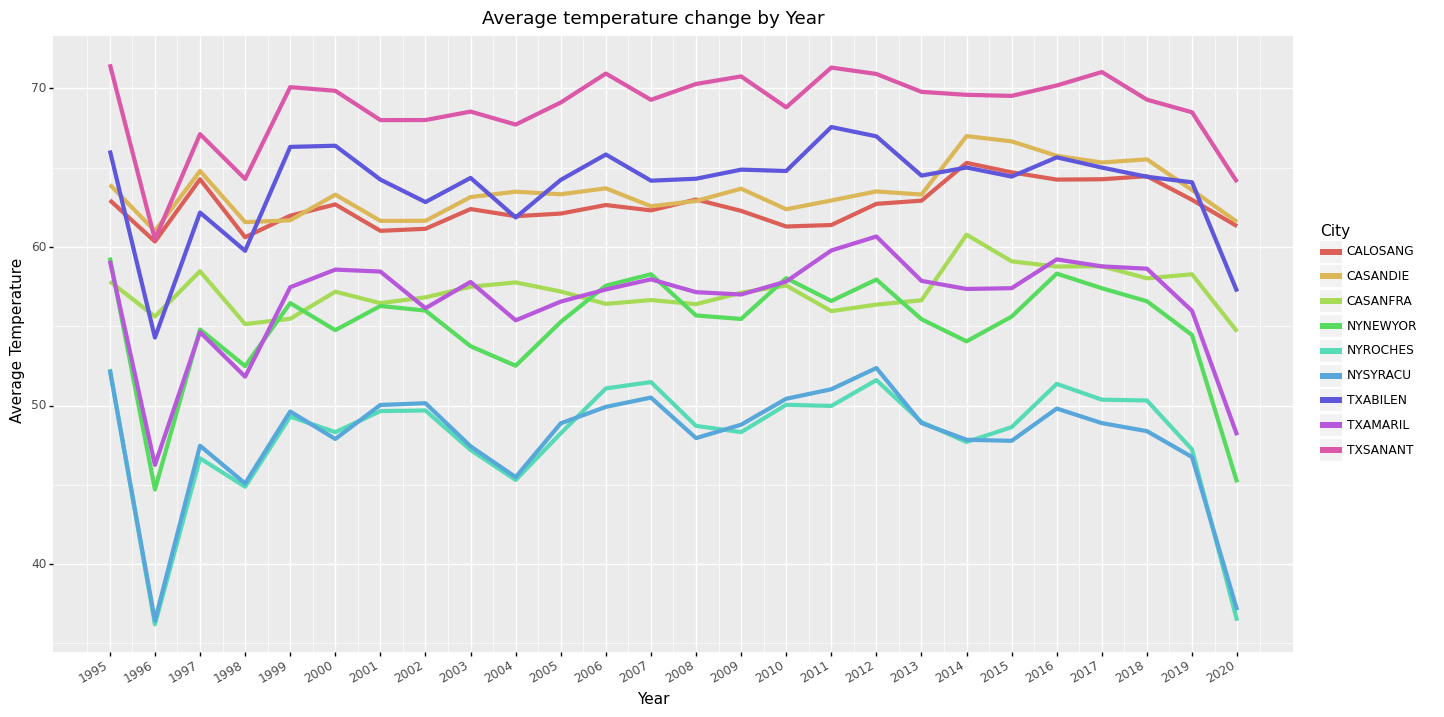

<ggplot: (8779647764523)>

In [9]:
# plotnine => Average Temperature change by Year

gg = p9.ggplot(Major_cities)
gg += p9.aes(x="Year",
            y="Avg_t",
            color="City")
gg += p9.geom_line(alpha=1, size=1.7)
gg += scale_x_continuous(breaks=range(1995,2021,1))
gg += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=30, hjust=1)))
gg += xlab("Year")
gg += ylab("Average Temperature")
gg += labs(title="Average temperature change by Year")

gg

First, we had chosen three cities each from West, East, and Central America. The selection criteria are based on famous well-known cities. We believe that most environmental activities are starting in the big cities. The above plot describes a total of nine different cities' average temperature change over time. To show the difference the plot is drawn in line. 

As you can see from the plot, except for **1996** and **2020** there was no drastic change over time. The average temperatures of cities are going up and down constantly. Moreover, it is hard to tell the average temperature had been rising. Overall the city with the highest average temperature in Los Angeles and the lowest is Syracuse. 

In [10]:
#second_data

second_sql='''
select City, Year, Month, avg(Temp) as Avg_t from state group by City, Year, Month order by Year
'''

second_data= pd.read_sql_query(second_sql,df_conn)
second_data

,City,Year,Month,Avg_t
0,AKANCHOR,1995,2,28.200000
1,AKANCHOR,1995,3,19.578571
2,AKANCHOR,1995,4,39.772414
3,AKANCHOR,1995,5,48.625806
4,AKANCHOR,1995,6,55.773333
...,...,...,...,...
45889,WYCHEYEN,2020,1,30.762069
45890,WYCHEYEN,2020,2,27.258621
45891,WYCHEYEN,2020,3,37.125806
45892,WYCHEYEN,2020,4,40.517241


In [11]:
second_data["Avg_t"].describe()

count    45894.000000
mean        56.253887
std         17.627294
min        -25.480000
25%         43.167852
50%         57.817262
75%         70.871667
max         98.692000
Name: Avg_t, dtype: float64

In [12]:
# Data contains from 1995/2 to 2020/5 
# Seperate the data fram by year in every 3 years
Major_city_per_month = second_data[second_data["City"].isin(city_lst)]

City_1996 = Major_city_per_month[Major_city_per_month["Year"]==1996]
City_1999 = Major_city_per_month[Major_city_per_month["Year"]==1999]
City_2002 = Major_city_per_month[Major_city_per_month["Year"]==2002]
City_2005 = Major_city_per_month[Major_city_per_month["Year"]==2005]
City_2008 = Major_city_per_month[Major_city_per_month["Year"]==2008]
City_2011 = Major_city_per_month[Major_city_per_month["Year"]==2011]
City_2014 = Major_city_per_month[Major_city_per_month["Year"]==2014]
City_2017 = Major_city_per_month[Major_city_per_month["Year"]==2017]
City_2019 = Major_city_per_month[Major_city_per_month["Year"]==2019]


In [13]:
# Graph for the year 1996
gg96 = p9.ggplot(City_1996)
gg96 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg96 += p9.geom_line(alpha=1, size=1.7)
gg96 += scale_x_continuous(breaks=range(1,13,1))
gg96 += scale_y_continuous(breaks=range(-30,100,3))
gg96 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg96 += xlab("Month")
gg96 += ylab("Average Temperature")
gg96 += labs(title="Average temperature change by Month, 1996")

# Graph for the year 2008
gg08 = p9.ggplot(City_2008)
gg08 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg08 += p9.geom_line(alpha=1, size=1.7)
gg08 += scale_x_continuous(breaks=range(1,13,1))
gg08 += scale_y_continuous(breaks=range(-30,100,3))
gg08 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg08 += xlab("Month")
gg08 += ylab("Average Temperature")
gg08 += labs(title="Average temperature change by Month, 2008")

# Graph for the year 2019
gg19 = p9.ggplot(City_2019)
gg19 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg19 += p9.geom_line(alpha=1, size=1.7)
gg19 += scale_x_continuous(breaks=range(1,13,1))
gg19 += scale_y_continuous(breaks=range(-30,100,3))
gg19 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg19 += xlab("Month")
gg19 += ylab("Average Temperature")
gg19 += labs(title="Average temperature change by Month, 2019")


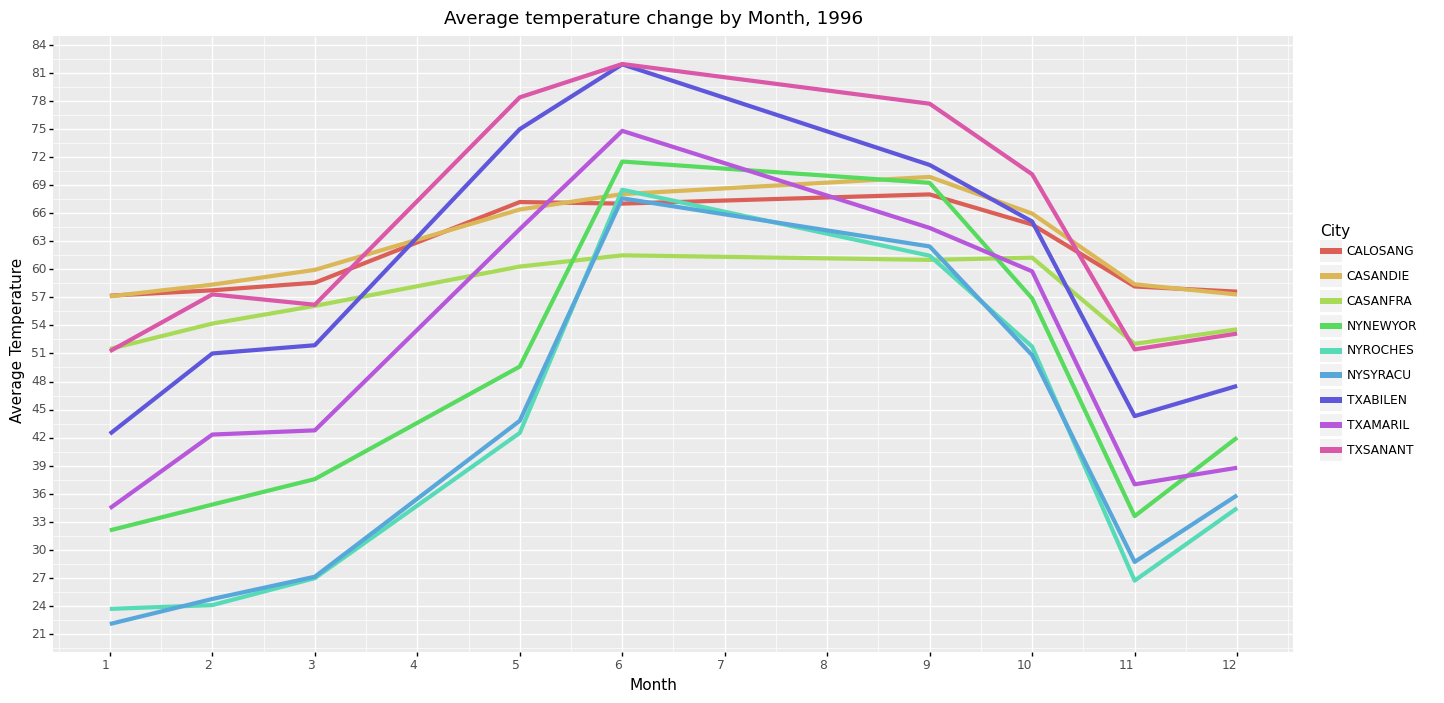

<ggplot: (8779651724915)>

In [14]:
gg96

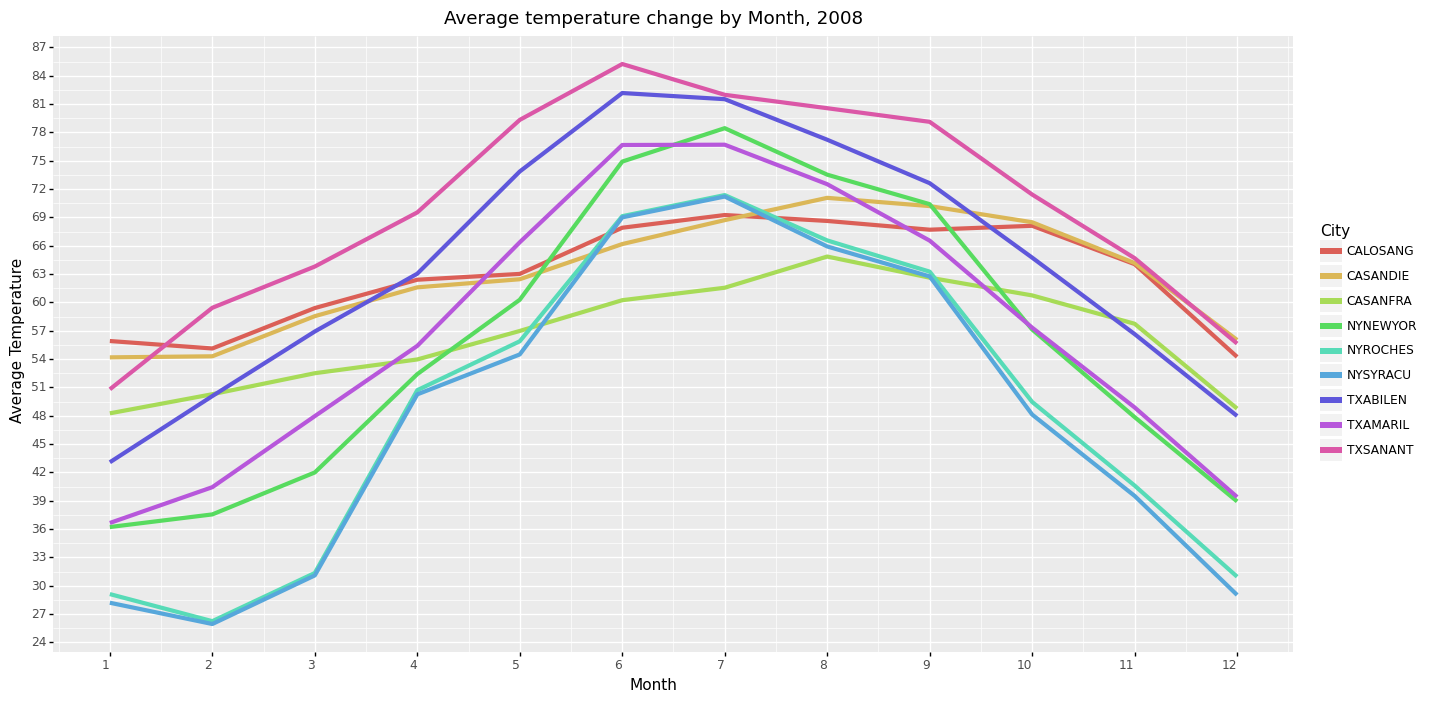

<ggplot: (8779651724909)>

In [15]:
gg08

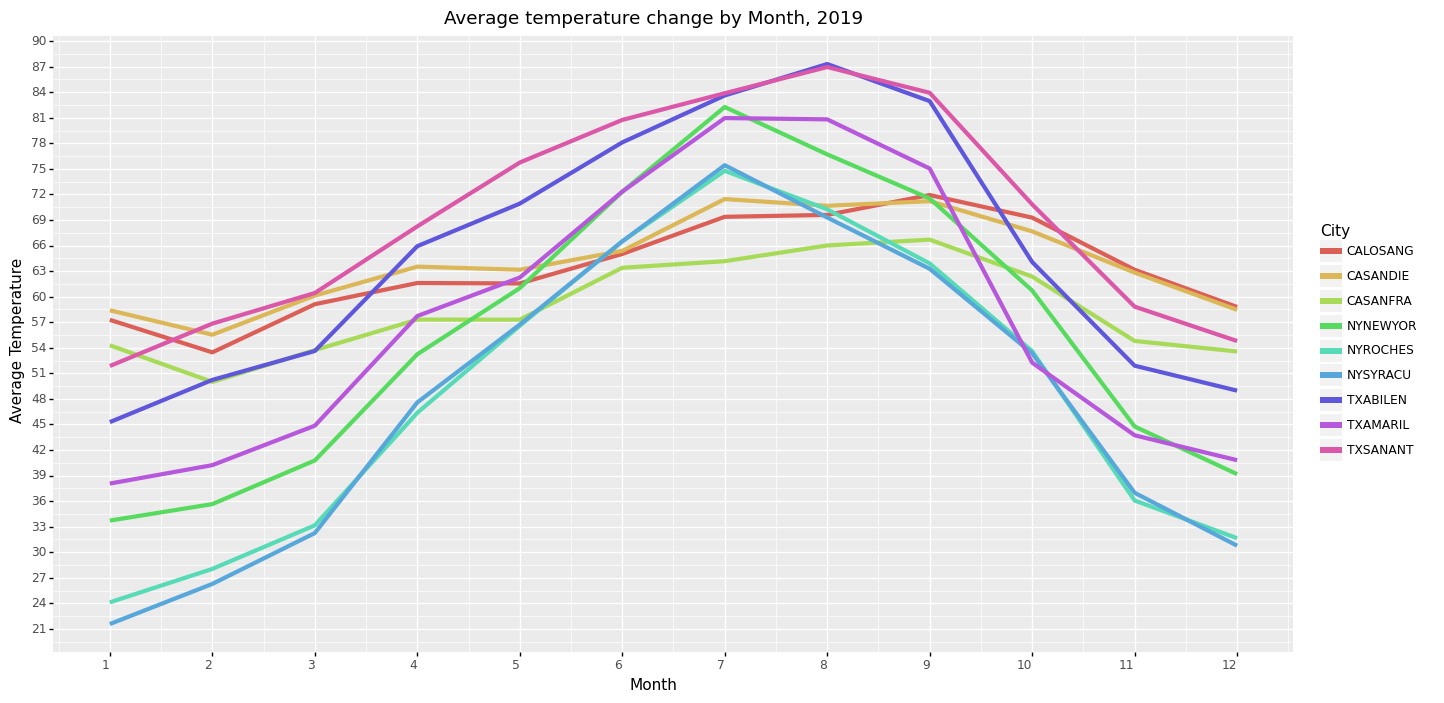

<ggplot: (8779651682479)>

In [16]:
gg19

This time we had chose the start, middle, and end of the year to see the average temperature change over the month. Also, this aim is to see the differences comparing three plots over time. 

According to plots from 1996, 2008, and 2019, the maximum temperature is rising. The difference is that the highest peak month is moving to the right. In 1996 the highest temperature of the year is around May and June while in 2008 it is June to July and in 2019 it is July to August. 


### Data Exploration (ASIA)

In [17]:
# Import asia data set
path_asia = path + "/asia"

filenames_asia = glob.glob(os.path.join(os.getcwd(), path_asia, "*.txt"))
dataframes_asia = []

df_asia = pd.concat([pd.read_csv(fp,sep ='\s+',header=None).assign(City = os.path.basename(fp).split('.')[0])
   for fp in filenames_asia
])

# rename columns
df_asia=df_asia.rename(columns={0:'Month',1:'Day',2:'Year',3:'Temp'})
df_asia = df_asia[["City","Day","Month","Year","Temp"]]

indexNames = df_asia[ df_asia['Temp'] == -99 ].index
df_asia_clean=df_asia.copy()
df_asia_clean.drop(indexNames , inplace=True)

df_asia_clean.reset_index(inplace=True)
df_asia_clean.drop(columns="index", inplace=True)

# reorder columns
df_asia_clean = df_asia_clean[["City","Day","Month","Year","Temp"]]

df_asia_clean

,City,Day,Month,Year,Temp
0,JPSAPPOR,16,9,1996,63.2
1,JPSAPPOR,17,9,1996,64.8
2,JPSAPPOR,18,9,1996,64.3
3,JPSAPPOR,19,9,1996,66.5
4,JPSAPPOR,20,9,1996,64.4
...,...,...,...,...,...
138319,MSKUALA,9,5,2020,85.4
138320,MSKUALA,10,5,2020,84.9
138321,MSKUALA,11,5,2020,87.2
138322,MSKUALA,12,5,2020,85.4


In [18]:
df_asia_clean.City

0         JPSAPPOR
1         JPSAPPOR
2         JPSAPPOR
3         JPSAPPOR
4         JPSAPPOR
            ...   
138319     MSKUALA
138320     MSKUALA
138321     MSKUALA
138322     MSKUALA
138323     MSKUALA
Name: City, Length: 138324, dtype: object

In [19]:
# aisa sqlite
sqlite_file_asia = 'aisatemp.sqlite'
table_name_asia = 'state_asia'

df_conn_asia = sqla.create_engine('sqlite:///' + sqlite_file_asia)
connection = df_conn_asia.raw_connection()
cursor = connection.cursor()
command = "DROP TABLE IF EXISTS {};".format(table_name_asia)
cursor.execute(command)
connection.commit()
cursor.close()

df_asia.to_sql('state_asia', df_conn_asia, if_exists='replace')


In [20]:
#seoul_data
korea_sql='''
select City, Year, avg(Temp) as Avg_t from state_asia where City = 'KOSEOUL' group by Year
'''

korea_data= pd.read_sql_query(korea_sql,df_conn_asia)
korea_data

,City,Year,Avg_t
0,KOSEOUL,1995,51.753425
1,KOSEOUL,1996,51.634153
2,KOSEOUL,1997,52.602466
3,KOSEOUL,1998,53.550959
4,KOSEOUL,1999,53.366027
5,KOSEOUL,2000,52.375683
6,KOSEOUL,2001,52.026849
7,KOSEOUL,2002,51.413973
8,KOSEOUL,2003,53.143288
9,KOSEOUL,2004,54.840437


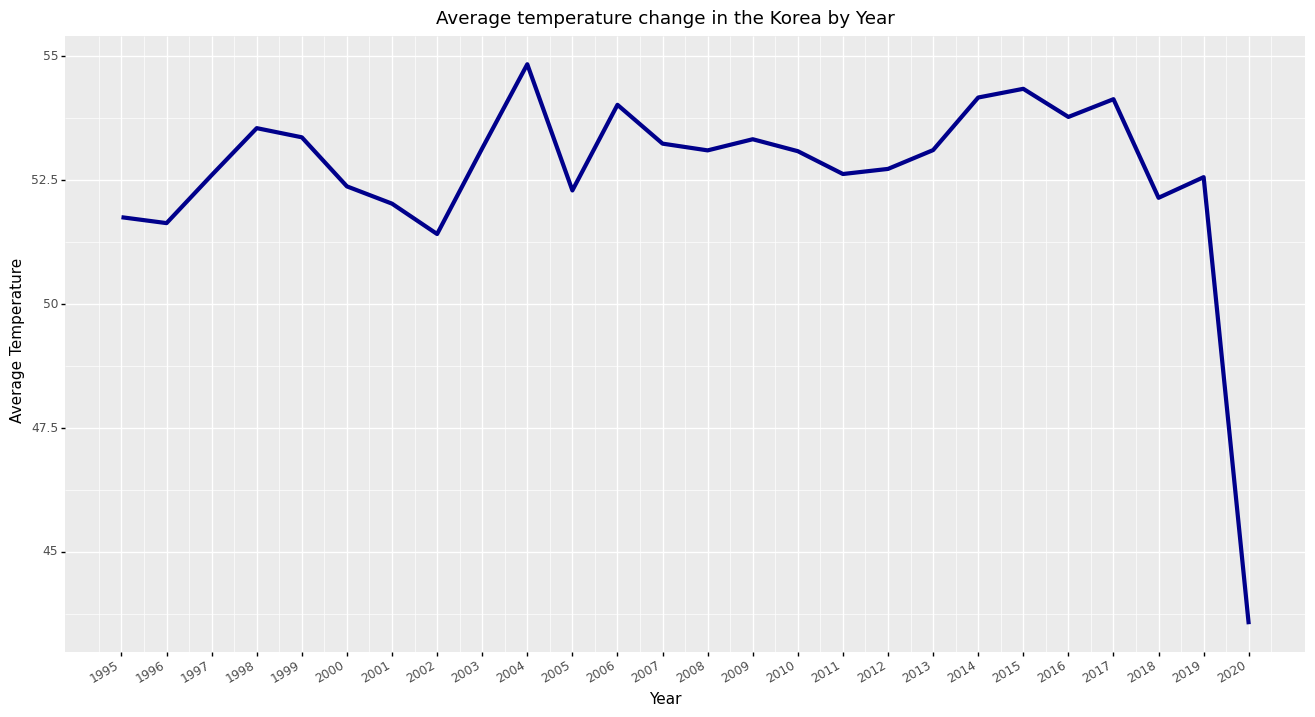

<ggplot: (8779651675332)>

In [21]:
#seoul graph
#korea_data.plot(x='Year',y='Avg_t')

ggk = p9.ggplot(korea_data)
ggk += p9.aes(x="Year",
            y="Avg_t")
ggk += p9.geom_line(alpha=1, size=1.7, color='darkblue')
ggk += scale_x_continuous(breaks=range(1995,2021,1))
ggk += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=30, hjust=1)))
ggk += xlab("Year")
ggk += ylab("Average Temperature")
ggk += labs(title="Average temperature change in the Korea by Year")

ggk

Compares to the **US** dataset **Korea** data shows different aspects. The biggest difference is 1996. Unlike the previous plot, There was no drastic temperature drop in 1996. Also, the range of fluctuation is less than the US dataset. One the reason is that Korea has four distinct seasons which makes constant average temperature over the year. But also there are similarities such as the fact that it is hard to tell the average temperature is rising over time. 

 **World CO2 emission changes over time**

In [22]:
# Import world CO2 emission data set
co2_df = pd.read_csv("/Users/wook/Documents/Github/UC-DAVIS/STA141B/co2_emission.csv")

In [23]:
co2_df.head(10)

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256
5,Afghanistan,AFG,1954,106256
6,Afghanistan,AFG,1955,153888
7,Afghanistan,AFG,1956,183200
8,Afghanistan,AFG,1957,293120
9,Afghanistan,AFG,1958,329760


In [24]:
# Get data only from 1995 to 2020
year_range = []
for i in range(1995,2021):
    year_range.append(i)
co2_us = co2_df.loc[(co2_df["Code"]=="USA") & (co2_df["Year"].isin(year_range))]

co2_us

,Entity,Code,Year,Annual CO2 emissions
22816,United States,USA,1995,5421502465
22817,United States,USA,1996,5610581589
22818,United States,USA,1997,5686464995
22819,United States,USA,1998,5731049595
22820,United States,USA,1999,5804668919
22821,United States,USA,2000,6010508353
22822,United States,USA,2001,5904881595
22823,United States,USA,2002,5946770566
22824,United States,USA,2003,6011837495
22825,United States,USA,2004,6114006880


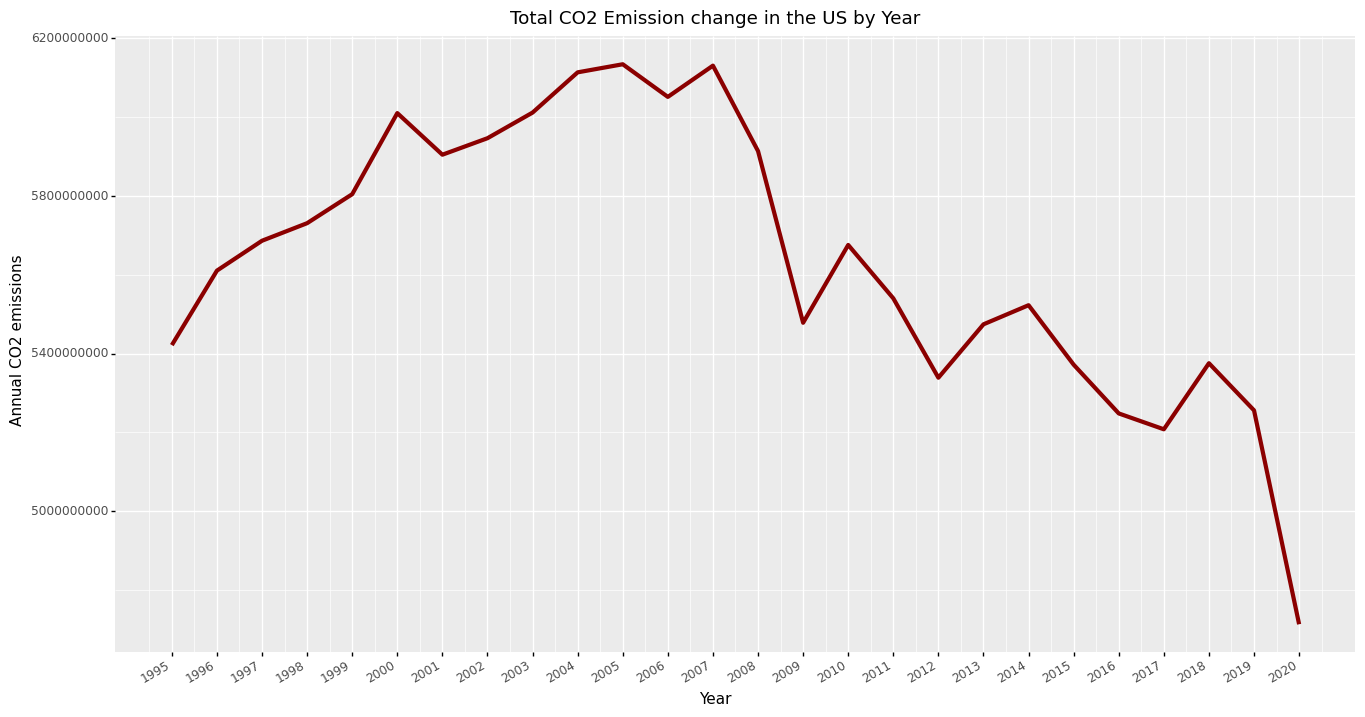

<ggplot: (8779643034248)>

In [25]:
# CO2 Emission graph
ggE = p9.ggplot(co2_us)
ggE += p9.aes(x="Year",
            y="Annual CO2 emissions")
ggE += p9.geom_line(alpha=1, size=1.7, color='darkred')
ggE += scale_x_continuous(breaks=range(1995,2021,1))
ggE += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=30, hjust=1)))
ggE += xlab("Year")
ggE += ylab("Annual CO2 emissions")
ggE += labs(title="Total CO2 Emission change in the US by Year")

ggE

In Addition to the average temperature plots above **"Total CO2 Emission change in the US by year"** shows the CO2 emission change in the US over time. Until **2007** total CO2 emission had been steadily increased. After it reached its peak number started to decrease.  

### Data Analysis

By observing the average temperature graphs above, we could see one common aspect, which was a rapid decrease in the temperature in the year 2020. The reason is that our temperature data set included average temperature starting from February 1995 to May 2020. Thus, the average temperature in the year 2020 should be dropped because it did not contain the temperature in Summer weather. 

Also, all the major cities we chose had an abysmal ravine in the year 1996. Since it was an abnormal case, we had decided to focus more on the research of **the reason for the rapid drop of the average temperature in the year 1996**. Various aspects affected the weather and the temperature, so it was nearly impossible to figure out the exact reasons to explain the average temperature of 1996. However, one possible aspect might be the cause of **the blizzard** that happened in early January 1996. On January 6th, the massive blizzard and storm struck all over the east coast of the United States, such as Virginia, Washington D.C., Baltimore, Philadelphia, Pennsylvania, and New York City, with heavy snow that to be recorded in U.S. history. Thus, the weather got colder than the usual winter weather and it became one of the aspects that caused the average temperature to be dropped approximately 2~3 Fahrenheit degree. 

Before 2007, US CO2 emissions grew every year. However, beginning in 2007, US emissions decreased, reaching a minimum every year. Total CO2 emission in 2012 is 12% lower than in 2007 and 5% lower than in 1997. This recent decline is good news and is consistent with the Obama administration’s stated goal of reducing CO2 emissions by 17% in 2020 and 83% in 2050 relative to 2005 levels.

Coinciding with the **2007 decline in CO2 emissions**, innovations in hydraulic fracturing technology have dramatically increased domestic supplies of gas. Commentators in the scientific community and media have linked the two trends. Also, the Third National Climate Assessment of the United States Global Change Research Program stated that the decrease in US CO2 emissions was largely due to a shift from coal to less CO2 intensive natural gas for electricity production.

However, it is still hard to say substitution of gas for coal had resulted in the emissions reduction of US CO2 emissions since 2007. Before 2007, rising emissions were driven by economic growth. On the other hand, the global economic recession was due to huge decreased consumption and changes in the production structure of the US economy while there were less related to changes in the fuel mix. It means that **human effect had a relatively minor role in the reduction of CO2 emissions**.

That is why even though CO2 emissions had dropped the average temperature hasn't changed. Therefore it is hard to relate global warming and climate change with plastic usage. The correlation between variables is small. 

### Conclusion

In short, it is hard to say there are strong human effects on the environment. There's a big gap to think using plastic product causes an increase in CO2 emissions and lead to global warming. Through our data analysis, we had proven that there is less correlation between human influence with global climate change. 

According to the results, temperatures are not drastically increasing as people expected. However, reducing the use of disposable products is important. Not because of global climate change rather it is a matter of people's injudicious use. Today people mass-produce everything and just throw away mindless which end up in landfills. The landfills in many big cities are already full. That is why we need to take close look at our environment and try all the environmental acts.


### Reference

* Feng, Kuishuang, et al. “Drivers of the US CO2 Emissions 1997–2013.” Nature News, Nature Publishing Group, 21 July 2015, https://www.nature.com/articles/ncomms8714. 

* Temperature Data Archive, https://academic.udayton.edu/kissock/http/Weather/default.htm. 

* CO2 Emission, https://ourworldindata.org/co2-emissions

* Ambrose, Kevin. “Remembering the Blizzard of 1996 That Paralyzed Washington, D.C.” The Washington Post, WP Company, 4 Dec. 2021, https://www.washingtonpost.com/news/capital-weather-gang/wp/2016/01/06/remembering-the-blizzard-of-1996-that-paralyzed-washington-d-c/. 